In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt 
import spacy

In [28]:
df = pd.read_csv("training_set_rel3.csv")

In [29]:
df

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,17.0,18.0,NaN,35.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12974,21628,8,I never understood the meaning laughter is th...,15.0,17.0,NaN,32.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20.0,26.0,40.0,40.0,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12976,21630,8,Trippin' on fen...,20.0,20.0,NaN,40.0,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
dfx = df[(df.essay_set == 1) | (df.essay_set == 2) | (df.essay_set == 8)]
dfx

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,17.0,18.0,NaN,35.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12974,21628,8,I never understood the meaning laughter is th...,15.0,17.0,NaN,32.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20.0,26.0,40.0,40.0,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12976,21630,8,Trippin' on fen...,20.0,20.0,NaN,40.0,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
dfx.isna().sum()

essay_id             0
essay_set            0
essay                0
rater1_domain1       0
rater2_domain1       0
rater3_domain1    4178
domain1_score        0
rater1_domain2    2506
rater2_domain2    2506
domain2_score     2506
rater1_trait1     3583
rater1_trait2     3583
rater1_trait3     3583
rater1_trait4     3583
rater1_trait5     3583
rater1_trait6     3583
rater2_trait1     3583
rater2_trait2     3583
rater2_trait3     3583
rater2_trait4     3583
rater2_trait5     3583
rater2_trait6     3583
rater3_trait1     4178
rater3_trait2     4178
rater3_trait3     4178
rater3_trait4     4178
rater3_trait5     4178
rater3_trait6     4178
dtype: int64

In [32]:
dfx.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,4306.000000,4306.000000,4306.000000,4306.000000,128.000000,4306.000000,1800.000000,1800.000000,1800.000000,723.000000,...,723.000000,723.000000,723.000000,723.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,5545.487692,2.593358,6.271249,6.319554,37.828125,11.163261,3.333889,3.330556,3.333889,3.760719,...,4.016598,3.892116,3.777317,3.589212,3.945312,3.890625,4.078125,3.992188,3.843750,3.617188
std,7165.854301,2.471438,5.636557,5.708284,5.240829,12.100971,0.729103,0.726807,0.729103,0.711602,...,0.686031,0.622284,0.689401,0.693256,0.643668,0.630390,0.622535,0.509687,0.538845,0.603417
min,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
25%,1079.250000,1.000000,3.000000,3.000000,36.000000,4.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,3347.500000,2.000000,4.000000,4.000000,40.000000,8.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4423.750000,2.000000,5.000000,5.000000,40.000000,10.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,21633.000000,8.000000,30.000000,30.000000,50.000000,60.000000,4.000000,4.000000,4.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000


In [33]:
dfx

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,17.0,18.0,NaN,35.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12974,21628,8,I never understood the meaning laughter is th...,15.0,17.0,NaN,32.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20.0,26.0,40.0,40.0,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12976,21630,8,Trippin' on fen...,20.0,20.0,NaN,40.0,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
from sklearn.impute import SimpleImputer

#imputer = SimpleImputer(strategy='most_frequent')
#imputer.fit_transform(dfx['rater1_domain2'])
imputer = SimpleImputer(strategy='most_frequent')
dfx['rater1_domain2'] = imputer.fit_transform(dfx[['rater1_domain2']])
dfx['rater3_domain1'] = imputer.fit_transform(dfx[['rater3_domain1']])
dfx['rater2_domain2'] = imputer.fit_transform(dfx[['rater2_domain2']])
dfx['domain2_score'] = imputer.fit_transform(dfx[['domain2_score']])
dfx['rater1_trait1'] = imputer.fit_transform(dfx[['rater1_trait1']])
dfx['rater1_trait2'] = imputer.fit_transform(dfx[['rater1_trait2']])
dfx['rater1_trait3'] = imputer.fit_transform(dfx[['rater1_trait3']])
dfx['rater1_trait4'] = imputer.fit_transform(dfx[['rater1_trait4']])
dfx['rater1_trait5'] = imputer.fit_transform(dfx[['rater1_trait5']])
dfx['rater1_trait6'] = imputer.fit_transform(dfx[['rater1_trait6']])
dfx['rater2_trait1'] = imputer.fit_transform(dfx[['rater2_trait1']])
dfx['rater2_trait2'] = imputer.fit_transform(dfx[['rater2_trait2']])
dfx['rater2_trait3'] = imputer.fit_transform(dfx[['rater2_trait3']])
dfx['rater2_trait4'] = imputer.fit_transform(dfx[['rater2_trait4']])
dfx['rater2_trait5'] = imputer.fit_transform(dfx[['rater2_trait5']])
dfx['rater2_trait6'] = imputer.fit_transform(dfx[['rater2_trait6']])
dfx['rater3_trait1'] = imputer.fit_transform(dfx[['rater3_trait1']])
dfx['rater3_trait2'] = imputer.fit_transform(dfx[['rater3_trait2']])
dfx['rater3_trait3'] = imputer.fit_transform(dfx[['rater3_trait3']])
dfx['rater3_trait4'] = imputer.fit_transform(dfx[['rater3_trait4']])
dfx['rater3_trait5'] = imputer.fit_transform(dfx[['rater3_trait5']])
dfx['rater3_trait6'] = imputer.fit_transform(dfx[['rater3_trait6']])
dfx

C:\Users\kylet\AppData\Local\Temp\ipykernel_65292\2473312405.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['rater1_domain2'] = imputer.fit_transform(dfx[['rater1_domain2']])
C:\Users\kylet\AppData\Local\Temp\ipykernel_65292\2473312405.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['rater3_domain1'] = imputer.fit_transform(dfx[['rater3_domain1']])
C:\Users\kylet\AppData\Local\Temp\ipykernel_65292\2473312405.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,40.0,8.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,40.0,9.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,40.0,7.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,40.0,10.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,40.0,8.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,17.0,18.0,40.0,35.0,4.0,4.0,4.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
12974,21628,8,I never understood the meaning laughter is th...,15.0,17.0,40.0,32.0,4.0,4.0,4.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20.0,26.0,40.0,40.0,4.0,4.0,4.0,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12976,21630,8,Trippin' on fen...,20.0,20.0,40.0,40.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [22]:
dfx.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')

In [35]:
dfx

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,40.0,8.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,40.0,9.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,40.0,7.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,40.0,10.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,40.0,8.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,17.0,18.0,40.0,35.0,4.0,4.0,4.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
12974,21628,8,I never understood the meaning laughter is th...,15.0,17.0,40.0,32.0,4.0,4.0,4.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20.0,26.0,40.0,40.0,4.0,4.0,4.0,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12976,21630,8,Trippin' on fen...,20.0,20.0,40.0,40.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [36]:
dfx.isna().sum()

essay_id          0
essay_set         0
essay             0
rater1_domain1    0
rater2_domain1    0
rater3_domain1    0
domain1_score     0
rater1_domain2    0
rater2_domain2    0
domain2_score     0
rater1_trait1     0
rater1_trait2     0
rater1_trait3     0
rater1_trait4     0
rater1_trait5     0
rater1_trait6     0
rater2_trait1     0
rater2_trait2     0
rater2_trait3     0
rater2_trait4     0
rater2_trait5     0
rater2_trait6     0
rater3_trait1     0
rater3_trait2     0
rater3_trait3     0
rater3_trait4     0
rater3_trait5     0
rater3_trait6     0
dtype: int64

In [39]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
dfx['domain1_score'] = min_max_scaler.fit_transform(dfx[['domain1_score']])

C:\Users\kylet\AppData\Local\Temp\ipykernel_65292\2057848084.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['domain1_score'] = min_max_scaler.fit_transform(dfx[['domain1_score']])


In [40]:
dfx

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,40.0,0.118644,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,40.0,0.135593,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,40.0,0.101695,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,40.0,0.152542,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,40.0,0.118644,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,17.0,18.0,40.0,0.576271,4.0,4.0,4.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
12974,21628,8,I never understood the meaning laughter is th...,15.0,17.0,40.0,0.525424,4.0,4.0,4.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20.0,26.0,40.0,0.661017,4.0,4.0,4.0,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12976,21630,8,Trippin' on fen...,20.0,20.0,40.0,0.661017,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [43]:
import nltk
from nltk.corpus import wordnet
import textstat
from lexical_diversity import lex_div as ld

nlp = spacy.load("en_core_web_sm")
def get_token_nbr(x):
    doc = nlp(x)
    return(len(doc))

def get_mean_len(x):
    doc = nlp(x)
    longueur_phrases = [len(sent) for sent in doc.sents]
    longueur_moyenne_phrase = sum(longueur_phrases) / len(longueur_phrases) if longueur_phrases else 0
    return (longueur_moyenne_phrase)

def get_sophisticated_nbr(x):
    doc = nlp(x)
    nombre_mots_sophistiques = sum(1 for token in doc if len(token.text) > 6)
    return(nombre_mots_sophistiques)

def level_of_language(x):
    doc = nlp(x)
    longueur_phrases = [len(sent) for sent in doc.sents]
    longueur_moyenne_phrase = sum(longueur_phrases) / len(longueur_phrases) if longueur_phrases else 0
    nombre_mots_sophistiques = sum(1 for token in doc if len(token.text) > 6)
    niveau = "Élevé" if longueur_moyenne_phrase > 20 and nombre_mots_sophistiques > 10 else "Bas"
    return(niveau)

def gunning_fog(text):
    return textstat.gunning_fog(text)

def ari(text):
    return textstat.automated_readability_index(text)

def smog_index(text):
    return textstat.smog_index(text)

def flesch_kincaid(text):
    return textstat.flesch_kincaid_grade(text)

def coleman_liau(text):
    return textstat.coleman_liau_index(text)

def dale_chall_readability(text):
    return textstat.dale_chall_readability_score(text)

def root_ttr(text):
    flt = ld.flemmatize(text)
    return ld.root_ttr(flt)

def ttr(text):
    flt = ld.flemmatize(text)
    return ld.ttr(flt)

def log_ttr(text):
    flt = ld.flemmatize(text)
    return ld.log_ttr(flt)

def mass_ttr(text):
    flt = ld.flemmatize(text)
    return ld.maas_ttr(flt)

def msttr(text):
    flt = ld.flemmatize(text)
    return ld.msttr(flt)

def mtld(text):
    flt = ld.flemmatize(text)
    return ld.mtld(flt)

#nltk.download('wordnet')
#print(get_token_nbr("ijij ijr  , vri"))

dfx['token_nbr'] = dfx['essay'].apply(get_token_nbr)
dfx['mean_len'] = dfx['essay'].apply(get_mean_len)
dfx['sophisticated_nbr'] = dfx['essay'].apply(get_sophisticated_nbr)
dfx['level_of_language'] = dfx['essay'].apply(level_of_language)
dfx['gunning_fog'] = dfx['essay'].apply(gunning_fog)
dfx['ari'] = dfx['essay'].apply(ari)
dfx['smog_index'] = dfx['essay'].apply(smog_index)
dfx['flesch_kincaid'] = dfx['essay'].apply(flesch_kincaid)
dfx['coleman_liau'] = dfx['essay'].apply(coleman_liau)
dfx['dale_chall_readability'] = dfx['essay'].apply(dale_chall_readability)
dfx['root_ttr'] = dfx['essay'].apply(root_ttr)
dfx['ttr'] = dfx['essay'].apply(ttr)
dfx['log_ttr'] = dfx['essay'].apply(log_ttr)
dfx['mass_ttr'] = dfx['essay'].apply(mass_ttr)
dfx['msttr'] = dfx['essay'].apply(msttr)
dfx['mtld'] = dfx['essay'].apply(mtld)
dfx

C:\Users\kylet\AppData\Local\Temp\ipykernel_65292\2547506002.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['token_nbr'] = dfx['essay'].apply(get_token_nbr)
C:\Users\kylet\AppData\Local\Temp\ipykernel_65292\2547506002.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['mean_len'] = dfx['essay'].apply(get_mean_len)
C:\Users\kylet\AppData\Local\Temp\ipykernel_65292\2547506002.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,smog_index,flesch_kincaid,coleman_liau,dale_chall_readability,root_ttr,ttr,log_ttr,mass_ttr,msttr,mtld
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,40.0,0.118644,4.0,4.0,4.0,...,10.2,8.5,8.54,7.00,8.388915,0.456973,0.865443,0.053234,0.823333,81.724520
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,40.0,0.135593,4.0,4.0,4.0,...,11.6,9.1,7.95,7.28,8.647016,0.422434,0.857281,0.054427,0.822500,80.551938
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,40.0,0.101695,4.0,4.0,4.0,...,12.0,8.7,8.30,7.62,7.962502,0.476703,0.868436,0.053796,0.768000,65.733843
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,40.0,0.152542,4.0,4.0,4.0,...,12.3,9.7,10.97,8.34,10.134967,0.442748,0.869879,0.047851,0.784000,71.269453
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,40.0,0.118644,4.0,4.0,4.0,...,11.1,7.0,8.00,6.51,8.347300,0.387097,0.845478,0.057929,0.731111,47.805534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,17.0,18.0,40.0,0.576271,4.0,4.0,4.0,...,10.3,12.0,7.03,6.98,10.554877,0.362884,0.849615,0.051372,0.773750,74.744941
12974,21628,8,I never understood the meaning laughter is th...,15.0,17.0,40.0,0.525424,4.0,4.0,4.0,...,7.1,4.0,4.98,6.01,8.465869,0.361974,0.838815,0.058870,0.728000,58.847341
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20.0,26.0,40.0,0.661017,4.0,4.0,4.0,...,9.7,8.3,8.18,7.15,11.608108,0.405868,0.865552,0.046159,0.778750,72.512323
12976,21630,8,Trippin' on fen...,20.0,20.0,40.0,0.661017,4.0,4.0,4.0,...,8.5,5.5,6.55,6.70,9.398329,0.396092,0.853771,0.053164,0.767273,63.941469


In [48]:
def lvl(x):
    doc = nlp(x)
    longueur_phrases = [len(sent) for sent in doc.sents]
    longueur_moyenne_phrase = sum(longueur_phrases) / len(longueur_phrases) if longueur_phrases else 0
    nombre_mots_sophistiques = sum(1 for token in doc if len(token.text) > 6)
    niveau = 1 if longueur_moyenne_phrase > 20 and nombre_mots_sophistiques > 10 else 0
    return(niveau)

dfx['level_of_language'] = dfx['essay'].apply(lvl)
dfx

C:\Users\kylet\AppData\Local\Temp\ipykernel_65292\2565290732.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['level_of_language'] = dfx['essay'].apply(lvl)


,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,smog_index,flesch_kincaid,coleman_liau,dale_chall_readability,root_ttr,ttr,log_ttr,mass_ttr,msttr,mtld
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,40.0,0.118644,4.0,4.0,4.0,...,10.2,8.5,8.54,7.00,8.388915,0.456973,0.865443,0.053234,0.823333,81.724520
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,40.0,0.135593,4.0,4.0,4.0,...,11.6,9.1,7.95,7.28,8.647016,0.422434,0.857281,0.054427,0.822500,80.551938
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,40.0,0.101695,4.0,4.0,4.0,...,12.0,8.7,8.30,7.62,7.962502,0.476703,0.868436,0.053796,0.768000,65.733843
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,40.0,0.152542,4.0,4.0,4.0,...,12.3,9.7,10.97,8.34,10.134967,0.442748,0.869879,0.047851,0.784000,71.269453
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,40.0,0.118644,4.0,4.0,4.0,...,11.1,7.0,8.00,6.51,8.347300,0.387097,0.845478,0.057929,0.731111,47.805534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,17.0,18.0,40.0,0.576271,4.0,4.0,4.0,...,10.3,12.0,7.03,6.98,10.554877,0.362884,0.849615,0.051372,0.773750,74.744941
12974,21628,8,I never understood the meaning laughter is th...,15.0,17.0,40.0,0.525424,4.0,4.0,4.0,...,7.1,4.0,4.98,6.01,8.465869,0.361974,0.838815,0.058870,0.728000,58.847341
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20.0,26.0,40.0,0.661017,4.0,4.0,4.0,...,9.7,8.3,8.18,7.15,11.608108,0.405868,0.865552,0.046159,0.778750,72.512323
12976,21630,8,Trippin' on fen...,20.0,20.0,40.0,0.661017,4.0,4.0,4.0,...,8.5,5.5,6.55,6.70,9.398329,0.396092,0.853771,0.053164,0.767273,63.941469


In [47]:
dfx[['essay_id', 'essay_set', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6', 'token_nbr',
       'mean_len', 'sophisticated_nbr', 'gunning_fog',
       'ari', 'smog_index', 'flesch_kincaid', 'coleman_liau',
       'dale_chall_readability', 'root_ttr', 'ttr', 'log_ttr', 'mass_ttr',
       'msttr', 'mtld']].corr()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,smog_index,flesch_kincaid,coleman_liau,dale_chall_readability,root_ttr,ttr,log_ttr,mass_ttr,msttr,mtld
essay_id,1.000000,0.997694,0.929245,0.930906,-0.144419,0.901196,0.113057,0.113125,0.113057,-0.286847,...,-0.380684,-0.049679,-0.382107,-0.140985,0.324922,-0.188947,-0.068152,-0.113531,0.007026,0.008004
essay_set,0.997694,1.000000,0.932693,0.934353,-0.145219,0.905343,0.116381,0.117019,0.116381,-0.288390,...,-0.379956,-0.048848,-0.382414,-0.141033,0.326193,-0.190125,-0.068842,-0.113317,0.006816,0.008115
rater1_domain1,0.929245,0.932693,1.000000,0.976718,-0.076702,0.984885,0.296320,0.294353,0.296320,-0.091263,...,-0.259504,-0.072820,-0.295893,-0.096169,0.492021,-0.203988,-0.024483,-0.214552,0.113490,0.132238
rater2_domain1,0.930906,0.934353,0.976718,1.000000,-0.091323,0.983829,0.290749,0.296266,0.290749,-0.160018,...,-0.261288,-0.067892,-0.301847,-0.098520,0.481931,-0.206558,-0.030256,-0.206809,0.106999,0.124620
rater3_domain1,-0.144419,-0.145219,-0.076702,-0.091323,1.000000,-0.077442,-0.032171,-0.032347,-0.032171,0.296739,...,0.059987,-0.031508,0.078393,-0.004048,0.030522,-0.016037,-0.006623,-0.000169,0.032582,0.028718
domain1_score,0.901196,0.905343,0.984885,0.983829,-0.077442,1.000000,0.333990,0.334148,0.333990,-0.134804,...,-0.238721,-0.067913,-0.299288,-0.075661,0.490034,-0.165853,0.009910,-0.235741,0.123115,0.144188
rater1_domain2,0.113057,0.116381,0.296320,0.290749,-0.032171,0.333990,1.000000,0.866948,1.000000,-0.063888,...,0.244206,-0.046725,0.128216,0.018166,0.361465,-0.166665,-0.017164,-0.177056,0.197621,0.190005
rater2_domain2,0.113125,0.117019,0.294353,0.296266,-0.032347,0.334148,0.866948,1.000000,0.866948,-0.064238,...,0.240529,-0.027521,0.136478,0.019101,0.359385,-0.168715,-0.020036,-0.174121,0.197822,0.193201
domain2_score,0.113057,0.116381,0.296320,0.290749,-0.032171,0.333990,1.000000,0.866948,1.000000,-0.063888,...,0.244206,-0.046725,0.128216,0.018166,0.361465,-0.166665,-0.017164,-0.177056,0.197621,0.190005
rater1_trait1,-0.286847,-0.288390,-0.091263,-0.160018,0.296739,-0.134804,-0.063888,-0.064238,-0.063888,1.000000,...,0.166874,-0.048910,0.201700,0.032760,0.137772,-0.022162,0.017176,-0.045109,0.100377,0.139457


In [103]:
dfa = dfx.copy(deep=True)
dfa

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,smog_index,flesch_kincaid,coleman_liau,dale_chall_readability,root_ttr,ttr,log_ttr,mass_ttr,msttr,mtld
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,40.0,0.118644,4.0,4.0,4.0,...,10.2,8.5,8.54,7.00,8.388915,0.456973,0.865443,0.053234,0.823333,81.724520
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,40.0,0.135593,4.0,4.0,4.0,...,11.6,9.1,7.95,7.28,8.647016,0.422434,0.857281,0.054427,0.822500,80.551938
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,40.0,0.101695,4.0,4.0,4.0,...,12.0,8.7,8.30,7.62,7.962502,0.476703,0.868436,0.053796,0.768000,65.733843
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,40.0,0.152542,4.0,4.0,4.0,...,12.3,9.7,10.97,8.34,10.134967,0.442748,0.869879,0.047851,0.784000,71.269453
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,40.0,0.118644,4.0,4.0,4.0,...,11.1,7.0,8.00,6.51,8.347300,0.387097,0.845478,0.057929,0.731111,47.805534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,17.0,18.0,40.0,0.576271,4.0,4.0,4.0,...,10.3,12.0,7.03,6.98,10.554877,0.362884,0.849615,0.051372,0.773750,74.744941
12974,21628,8,I never understood the meaning laughter is th...,15.0,17.0,40.0,0.525424,4.0,4.0,4.0,...,7.1,4.0,4.98,6.01,8.465869,0.361974,0.838815,0.058870,0.728000,58.847341
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20.0,26.0,40.0,0.661017,4.0,4.0,4.0,...,9.7,8.3,8.18,7.15,11.608108,0.405868,0.865552,0.046159,0.778750,72.512323
12976,21630,8,Trippin' on fen...,20.0,20.0,40.0,0.661017,4.0,4.0,4.0,...,8.5,5.5,6.55,6.70,9.398329,0.396092,0.853771,0.053164,0.767273,63.941469


In [104]:
dfa['domain1_score'] = df['domain1_score']
dfa
dfa1 = dfa[dfa.essay_set == 1]
dfa2 = dfa[dfa.essay_set == 2]
dfa8 = dfa[dfa.essay_set == 8]

In [109]:
dfa8['domain1_score'] = (dfa8['domain1_score'] - dfa8['domain1_score'].min()) / (dfa8['domain1_score'].max() - dfa8['domain1_score'].min()) * (5 - 1) + 1
dfa8['domain1_score'] = dfa8['domain1_score'].round(1).astype(int)
dfa8

dfa8['rater1_domain1'] = (dfa8['rater1_domain1'] - dfa8['rater1_domain1'].min()) / (dfa8['rater1_domain1'].max() - dfa8['rater1_domain1'].min()) * (5 - 1) + 1
dfa8['rater1_domain1'] = dfa8['rater1_domain1'].round().astype(int)
dfa8

dfa8['rater2_domain1'] = (dfa8['rater2_domain1'] - dfa8['rater2_domain1'].min()) / (dfa8['rater2_domain1'].max() - dfa8['rater2_domain1'].min()) * (5 - 1) + 1
dfa8['rater2_domain1'] = dfa8['rater2_domain1'].round().astype(int)
dfa8

C:\Users\kylet\AppData\Local\Temp\ipykernel_65292\4134446402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa8['domain1_score'] = (dfa8['domain1_score'] - dfa8['domain1_score'].min()) / (dfa8['domain1_score'].max() - dfa8['domain1_score'].min()) * (5 - 1) + 1
C:\Users\kylet\AppData\Local\Temp\ipykernel_65292\4134446402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa8['domain1_score'] = dfa8['domain1_score'].round(1).astype(int)
C:\Users\kylet\AppData\Local\Temp\ipykernel_65292\4134446402.py:5

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,smog_index,flesch_kincaid,coleman_liau,dale_chall_readability,root_ttr,ttr,log_ttr,mass_ttr,msttr,mtld
12255,20716,8,A long time ago when I was in third grade I h...,3,3,40.0,2,4.0,4.0,4.0,...,7.0,4.9,5.10,5.87,8.880239,0.344361,0.835985,0.058103,0.735385,57.941611
12256,20717,8,Softball has to be one of the single most gre...,4,4,46.0,3,4.0,4.0,4.0,...,8.9,8.7,6.04,6.73,9.410880,0.336748,0.836588,0.056492,0.752000,53.910354
12257,20718,8,"Some people like making people laugh, I love ...",3,3,40.0,3,4.0,4.0,4.0,...,8.5,8.2,6.15,6.50,9.815495,0.336867,0.838663,0.055084,0.758750,53.950139
12258,20719,8,"""LAUGHTER"" @CAPS1 I hang out with my friends...",2,3,30.0,2,4.0,4.0,4.0,...,7.0,7.7,4.65,6.15,8.236343,0.309760,0.821376,0.062688,0.747143,57.215839
12259,20721,8,Well ima tell a story about the time i got @CA...,2,3,40.0,2,4.0,4.0,4.0,...,4.2,7.1,3.08,6.53,6.929993,0.272868,0.799240,0.071456,0.675000,36.700836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,3,3,40.0,3,4.0,4.0,4.0,...,10.3,12.0,7.03,6.98,10.554877,0.362884,0.849615,0.051372,0.773750,74.744941
12974,21628,8,I never understood the meaning laughter is th...,3,3,40.0,2,4.0,4.0,4.0,...,7.1,4.0,4.98,6.01,8.465869,0.361974,0.838815,0.058870,0.728000,58.847341
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",3,4,40.0,3,4.0,4.0,4.0,...,9.7,8.3,8.18,7.15,11.608108,0.405868,0.865552,0.046159,0.778750,72.512323
12976,21630,8,Trippin' on fen...,3,3,40.0,3,4.0,4.0,4.0,...,8.5,5.5,6.55,6.70,9.398329,0.396092,0.853771,0.053164,0.767273,63.941469


In [110]:
dfa1['domain1_score'] = (dfa1['domain1_score'] - dfa1['domain1_score'].min()) / (dfa1['domain1_score'].max() - dfa1['domain1_score'].min()) * (5 - 1) + 1
dfa1['domain1_score'] = dfa1['domain1_score'].round().astype(int)
dfa1

dfa1['rater1_domain1'] = (dfa1['rater1_domain1'] - dfa1['rater1_domain1'].min()) / (dfa1['rater1_domain1'].max() - dfa1['rater1_domain1'].min()) * (5 - 1) + 1
dfa1['rater1_domain1'] = dfa1['rater1_domain1'].round().astype(int)
dfa1

dfa1['rater2_domain1'] = (dfa1['rater2_domain1'] - dfa1['rater2_domain1'].min()) / (dfa1['rater2_domain1'].max() - dfa1['rater2_domain1'].min()) * (5 - 1) + 1
dfa1['rater2_domain1'] = dfa1['rater2_domain1'].round().astype(int)
dfa1

C:\Users\kylet\AppData\Local\Temp\ipykernel_65292\187734715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa1['domain1_score'] = (dfa1['domain1_score'] - dfa1['domain1_score'].min()) / (dfa1['domain1_score'].max() - dfa1['domain1_score'].min()) * (5 - 1) + 1
C:\Users\kylet\AppData\Local\Temp\ipykernel_65292\187734715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa1['domain1_score'] = dfa1['domain1_score'].round().astype(int)
C:\Users\kylet\AppData\Local\Temp\ipykernel_65292\187734715.py:5: Se

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,smog_index,flesch_kincaid,coleman_liau,dale_chall_readability,root_ttr,ttr,log_ttr,mass_ttr,msttr,mtld
0,1,1,"Dear local newspaper, I think effects computer...",3,3,40.0,3,4.0,4.0,4.0,...,10.2,8.5,8.54,7.00,8.388915,0.456973,0.865443,0.053234,0.823333,81.724520
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",4,3,40.0,4,4.0,4.0,4.0,...,11.6,9.1,7.95,7.28,8.647016,0.422434,0.857281,0.054427,0.822500,80.551938
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",3,3,40.0,3,4.0,4.0,4.0,...,12.0,8.7,8.30,7.62,7.962502,0.476703,0.868436,0.053796,0.768000,65.733843
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",4,4,40.0,4,4.0,4.0,4.0,...,12.3,9.7,10.97,8.34,10.134967,0.442748,0.869879,0.047851,0.784000,71.269453
4,5,1,"Dear @LOCATION1, I know having computers has a...",3,3,40.0,3,4.0,4.0,4.0,...,11.1,7.0,8.00,6.51,8.347300,0.387097,0.845478,0.057929,0.731111,47.805534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,1783,1,"Dear @CAPS1, @CAPS2 several reasons on way I t...",3,3,40.0,3,4.0,4.0,4.0,...,8.7,7.4,6.85,7.04,8.791802,0.394366,0.850131,0.055582,0.813333,83.428261
1779,1784,1,Do a adults and kids spend to much time on the...,3,3,40.0,3,4.0,4.0,4.0,...,8.2,3.8,6.12,6.60,7.353911,0.520000,0.876578,0.053638,0.760000,66.703622
1780,1785,1,My opinion is that people should have computer...,3,3,40.0,3,4.0,4.0,4.0,...,11.3,7.6,8.93,5.79,5.393136,0.316151,0.797026,0.082379,0.700000,37.228110
1781,1786,1,"Dear readers, I think that its good and bad to...",1,1,40.0,1,4.0,4.0,4.0,...,0.0,4.4,3.76,6.49,3.614784,0.933333,0.974523,0.021662,0.933333,63.000000


In [111]:
dfa2['domain1_score'] = (dfa2['domain1_score'] - dfa2['domain1_score'].min()) / (dfa2['domain1_score'].max() - dfa2['domain1_score'].min()) * (5 - 1) + 1
dfa2['domain1_score'] = dfa2['domain1_score'].round().astype(int)
dfa2

dfa2['rater1_domain1'] = (dfa2['rater1_domain1'] - dfa2['rater1_domain1'].min()) / (dfa2['rater1_domain1'].max() - dfa2['rater1_domain1'].min()) * (5 - 1) + 1
dfa2['rater1_domain1'] = dfa2['rater1_domain1'].round().astype(int)
dfa2

dfa2['rater2_domain1'] = (dfa2['rater2_domain1'] - dfa2['rater2_domain1'].min()) / (dfa2['rater2_domain1'].max() - dfa2['rater2_domain1'].min()) * (5 - 1) + 1
dfa2['rater2_domain1'] = dfa2['rater2_domain1'].round().astype(int)
dfa2

C:\Users\kylet\AppData\Local\Temp\ipykernel_65292\2543323758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa2['domain1_score'] = (dfa2['domain1_score'] - dfa2['domain1_score'].min()) / (dfa2['domain1_score'].max() - dfa2['domain1_score'].min()) * (5 - 1) + 1
C:\Users\kylet\AppData\Local\Temp\ipykernel_65292\2543323758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa2['domain1_score'] = dfa2['domain1_score'].round().astype(int)
C:\Users\kylet\AppData\Local\Temp\ipykernel_65292\2543323758.py:5:

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,smog_index,flesch_kincaid,coleman_liau,dale_chall_readability,root_ttr,ttr,log_ttr,mass_ttr,msttr,mtld
1783,2978,2,Certain materials being removed from libraries...,3,3,40.0,3,4.0,4.0,4.0,...,9.5,9.0,8.36,6.58,7.975277,0.365546,0.836773,0.060960,0.782222,65.014401
1784,2979,2,Write a persuasive essay to a newspaper reflec...,1,2,40.0,1,1.0,2.0,1.0,...,11.7,15.0,6.17,8.07,5.786376,0.446429,0.842607,0.070729,0.646667,27.649734
1785,2980,2,Do you think that libraries should remove cert...,2,3,40.0,2,3.0,3.0,3.0,...,8.2,4.3,5.44,6.09,7.416198,0.500000,0.871488,0.054863,0.785000,79.421162
1786,2981,2,"In @DATE1's world, there are many things found...",3,3,40.0,3,4.0,4.0,4.0,...,9.9,6.8,8.52,6.01,7.133912,0.330472,0.819792,0.067535,0.708889,48.332633
1787,2982,2,In life you have the 'offensive things'. The l...,3,3,40.0,3,4.0,4.0,4.0,...,7.9,4.5,6.95,6.48,9.054338,0.440758,0.864473,0.051623,0.767500,78.898466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,4773,2,The author is writting about taking books off ...,3,2,40.0,3,3.0,2.0,3.0,...,8.6,6.3,7.25,6.94,5.821616,0.376569,0.821663,0.074982,0.640000,35.190562
3579,4774,2,"I do not think that materials, such as books, ...",3,3,40.0,3,3.0,3.0,3.0,...,9.7,6.8,7.42,6.02,7.456762,0.479339,0.866031,0.056199,0.820000,68.067890
3580,4775,2,"Yes we should keep the books,music,movies,an m...",2,2,40.0,2,2.0,2.0,2.0,...,9.4,7.4,6.80,6.43,5.644325,0.530973,0.866090,0.065224,0.720000,46.577534
3581,4776,2,"I do believe that book, magazines, music, mov...",3,3,40.0,3,4.0,3.0,4.0,...,9.4,7.0,7.31,5.69,6.203874,0.276892,0.793502,0.076461,0.700000,42.361296


In [113]:
dfr = pd.concat([dfa1, dfa2, dfa8], ignore_index=True)
dfr

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,smog_index,flesch_kincaid,coleman_liau,dale_chall_readability,root_ttr,ttr,log_ttr,mass_ttr,msttr,mtld
0,1,1,"Dear local newspaper, I think effects computer...",3,3,40.0,3,4.0,4.0,4.0,...,10.2,8.5,8.54,7.00,8.388915,0.456973,0.865443,0.053234,0.823333,81.724520
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",4,3,40.0,4,4.0,4.0,4.0,...,11.6,9.1,7.95,7.28,8.647016,0.422434,0.857281,0.054427,0.822500,80.551938
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",3,3,40.0,3,4.0,4.0,4.0,...,12.0,8.7,8.30,7.62,7.962502,0.476703,0.868436,0.053796,0.768000,65.733843
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",4,4,40.0,4,4.0,4.0,4.0,...,12.3,9.7,10.97,8.34,10.134967,0.442748,0.869879,0.047851,0.784000,71.269453
4,5,1,"Dear @LOCATION1, I know having computers has a...",3,3,40.0,3,4.0,4.0,4.0,...,11.1,7.0,8.00,6.51,8.347300,0.387097,0.845478,0.057929,0.731111,47.805534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4301,21626,8,In most stories mothers and daughters are eit...,3,3,40.0,3,4.0,4.0,4.0,...,10.3,12.0,7.03,6.98,10.554877,0.362884,0.849615,0.051372,0.773750,74.744941
4302,21628,8,I never understood the meaning laughter is th...,3,3,40.0,2,4.0,4.0,4.0,...,7.1,4.0,4.98,6.01,8.465869,0.361974,0.838815,0.058870,0.728000,58.847341
4303,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",3,4,40.0,3,4.0,4.0,4.0,...,9.7,8.3,8.18,7.15,11.608108,0.405868,0.865552,0.046159,0.778750,72.512323
4304,21630,8,Trippin' on fen...,3,3,40.0,3,4.0,4.0,4.0,...,8.5,5.5,6.55,6.70,9.398329,0.396092,0.853771,0.053164,0.767273,63.941469


In [115]:
Res = dfr.copy(deep=True)
y = Res['domain1_score']
X = Res.drop(['essay', 'domain1_score'], axis=1).copy()

X

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,rater1_trait2,...,smog_index,flesch_kincaid,coleman_liau,dale_chall_readability,root_ttr,ttr,log_ttr,mass_ttr,msttr,mtld
0,1,1,3,3,40.0,4.0,4.0,4.0,4.0,4.0,...,10.2,8.5,8.54,7.00,8.388915,0.456973,0.865443,0.053234,0.823333,81.724520
1,2,1,4,3,40.0,4.0,4.0,4.0,4.0,4.0,...,11.6,9.1,7.95,7.28,8.647016,0.422434,0.857281,0.054427,0.822500,80.551938
2,3,1,3,3,40.0,4.0,4.0,4.0,4.0,4.0,...,12.0,8.7,8.30,7.62,7.962502,0.476703,0.868436,0.053796,0.768000,65.733843
3,4,1,4,4,40.0,4.0,4.0,4.0,4.0,4.0,...,12.3,9.7,10.97,8.34,10.134967,0.442748,0.869879,0.047851,0.784000,71.269453
4,5,1,3,3,40.0,4.0,4.0,4.0,4.0,4.0,...,11.1,7.0,8.00,6.51,8.347300,0.387097,0.845478,0.057929,0.731111,47.805534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4301,21626,8,3,3,40.0,4.0,4.0,4.0,4.0,3.0,...,10.3,12.0,7.03,6.98,10.554877,0.362884,0.849615,0.051372,0.773750,74.744941
4302,21628,8,3,3,40.0,4.0,4.0,4.0,3.0,3.0,...,7.1,4.0,4.98,6.01,8.465869,0.361974,0.838815,0.058870,0.728000,58.847341
4303,21629,8,3,4,40.0,4.0,4.0,4.0,4.0,4.0,...,9.7,8.3,8.18,7.15,11.608108,0.405868,0.865552,0.046159,0.778750,72.512323
4304,21630,8,3,3,40.0,4.0,4.0,4.0,4.0,4.0,...,8.5,5.5,6.55,6.70,9.398329,0.396092,0.853771,0.053164,0.767273,63.941469


In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [117]:
print(regr.score(X_test, y_test))

0.874722492746754


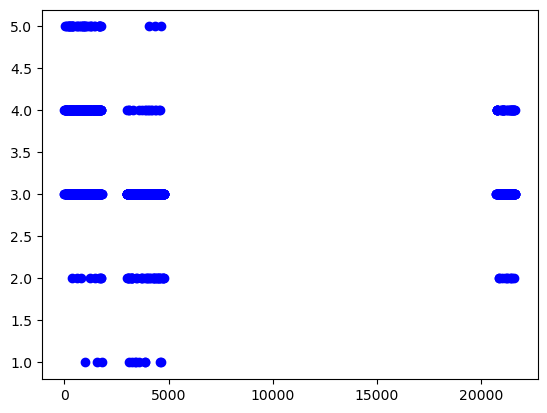

In [88]:
y_pred = regr.predict(X_test)
plt.scatter(X_test['essay_id'], y_test, color ='b')
#plt.plot(X_test['essay_id'], y_pred, color ='k')
 
plt.show()

In [73]:
dfr[['essay_id', 'essay_set', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6', 'token_nbr',
       'mean_len', 'sophisticated_nbr', 'gunning_fog',
       'ari', 'smog_index', 'flesch_kincaid', 'coleman_liau',
       'dale_chall_readability', 'root_ttr', 'ttr', 'log_ttr', 'mass_ttr',
       'msttr', 'mtld']].corr()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,smog_index,flesch_kincaid,coleman_liau,dale_chall_readability,root_ttr,ttr,log_ttr,mass_ttr,msttr,mtld
essay_id,1.000000,0.997694,0.929245,0.930906,-0.144419,-0.136739,0.113057,0.113125,0.113057,-0.286847,...,-0.380684,-0.049679,-0.382107,-0.140985,0.324922,-0.188947,-0.068152,-0.113531,0.007026,0.008004
essay_set,0.997694,1.000000,0.932693,0.934353,-0.145219,-0.135591,0.116381,0.117019,0.116381,-0.288390,...,-0.379956,-0.048848,-0.382414,-0.141033,0.326193,-0.190125,-0.068842,-0.113317,0.006816,0.008115
rater1_domain1,0.929245,0.932693,1.000000,0.976718,-0.076702,0.113694,0.296320,0.294353,0.296320,-0.091263,...,-0.259504,-0.072820,-0.295893,-0.096169,0.492021,-0.203988,-0.024483,-0.214552,0.113490,0.132238
rater2_domain1,0.930906,0.934353,0.976718,1.000000,-0.091323,0.103489,0.290749,0.296266,0.290749,-0.160018,...,-0.261288,-0.067892,-0.301847,-0.098520,0.481931,-0.206558,-0.030256,-0.206809,0.106999,0.124620
rater3_domain1,-0.144419,-0.145219,-0.076702,-0.091323,1.000000,0.091509,-0.032171,-0.032347,-0.032171,0.296739,...,0.059987,-0.031508,0.078393,-0.004048,0.030522,-0.016037,-0.006623,-0.000169,0.032582,0.028718
domain1_score,-0.136739,-0.135591,0.113694,0.103489,0.091509,1.000000,0.414437,0.399979,0.414437,0.207789,...,0.335978,-0.028951,0.295407,0.121070,0.529932,-0.185184,0.019251,-0.255979,0.312702,0.366397
rater1_domain2,0.113057,0.116381,0.296320,0.290749,-0.032171,0.414437,1.000000,0.866948,1.000000,-0.063888,...,0.244206,-0.046725,0.128216,0.018166,0.361465,-0.166665,-0.017164,-0.177056,0.197621,0.190005
rater2_domain2,0.113125,0.117019,0.294353,0.296266,-0.032347,0.399979,0.866948,1.000000,0.866948,-0.064238,...,0.240529,-0.027521,0.136478,0.019101,0.359385,-0.168715,-0.020036,-0.174121,0.197822,0.193201
domain2_score,0.113057,0.116381,0.296320,0.290749,-0.032171,0.414437,1.000000,0.866948,1.000000,-0.063888,...,0.244206,-0.046725,0.128216,0.018166,0.361465,-0.166665,-0.017164,-0.177056,0.197621,0.190005
rater1_trait1,-0.286847,-0.288390,-0.091263,-0.160018,0.296739,0.207789,-0.063888,-0.064238,-0.063888,1.000000,...,0.166874,-0.048910,0.201700,0.032760,0.137772,-0.022162,0.017176,-0.045109,0.100377,0.139457


In [75]:
(dfr[['essay_id', 'essay_set', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6', 'token_nbr',
       'mean_len', 'sophisticated_nbr', 'gunning_fog',
       'ari', 'smog_index', 'flesch_kincaid', 'coleman_liau',
       'dale_chall_readability', 'root_ttr', 'ttr', 'log_ttr', 'mass_ttr',
       'msttr', 'mtld']].corr()).to_excel('output.xlsx', index=False)

In [92]:
round(2.6)

3